**Clustering Algorithm Implementations**

In [1]:
# Library imports
import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_circles
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist

**K-Means Cluster Analysis**

In [2]:
# Load the dataset ‘x1_vals.npy’
data = np.load('x1_vals.npy')  # Using the numpy 'load' method
df = pd.DataFrame(data, columns=['0', '1'])  # Storing data as pandas dataframe for convenience. Ensuring column names are strings.
# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=['0', '1'])
df.head()

,0,1
0,-1.437393,-1.166966
1,-1.303608,-1.252367
2,-0.515689,-0.309900
3,-1.773017,-1.043845
4,-1.004362,-1.412992


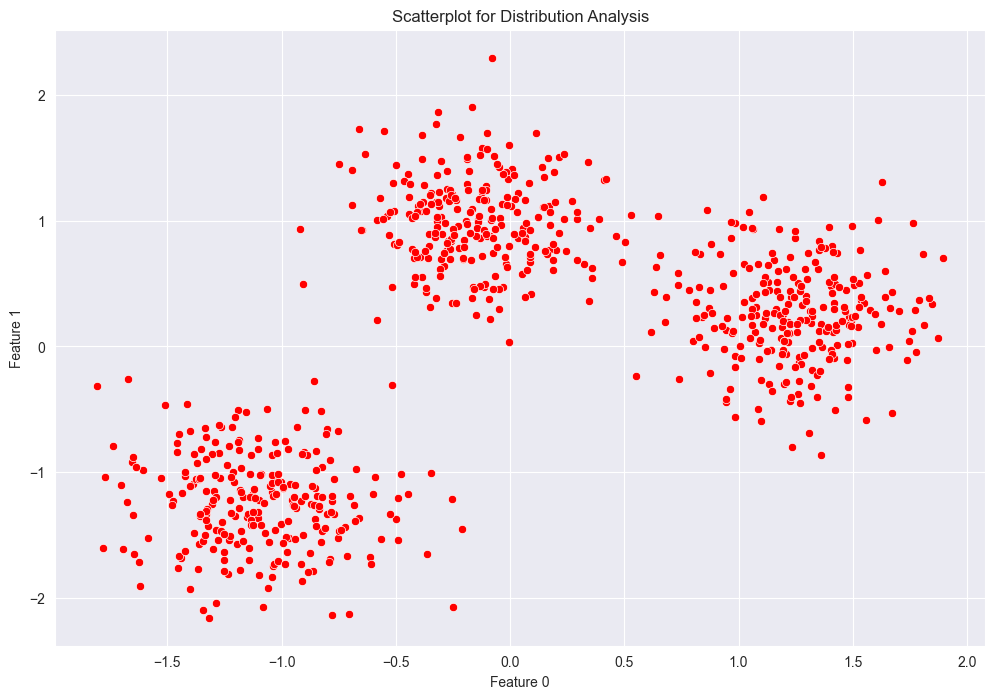

In [3]:
# Conduct an EDA to evaluate the data
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='0', y='1', color='red')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatterplot for Distribution Analysis')  # Adding title
plt.show()

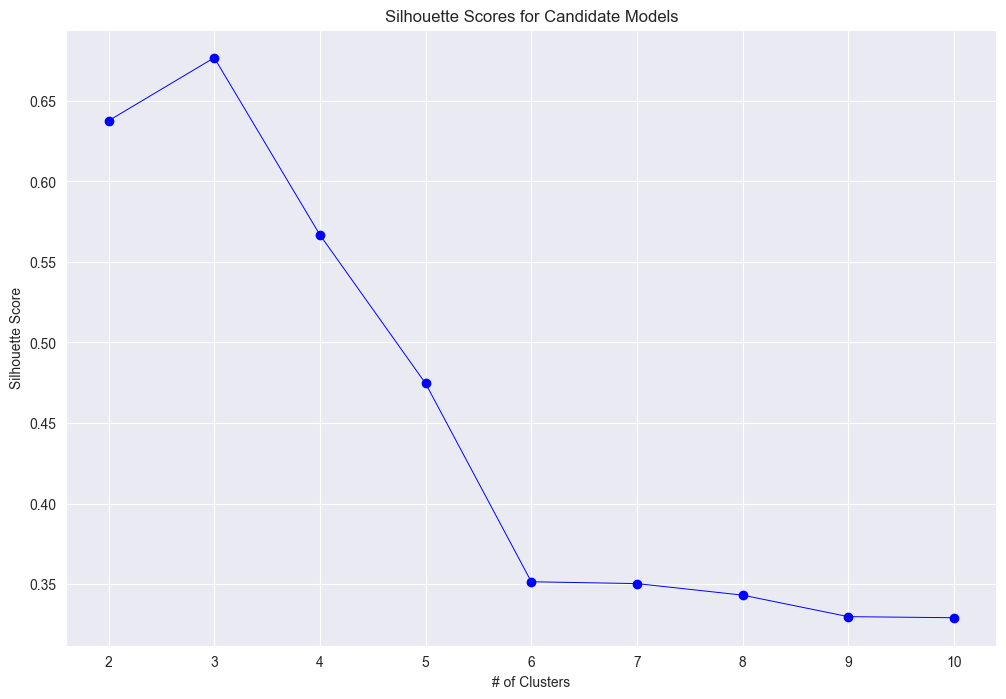

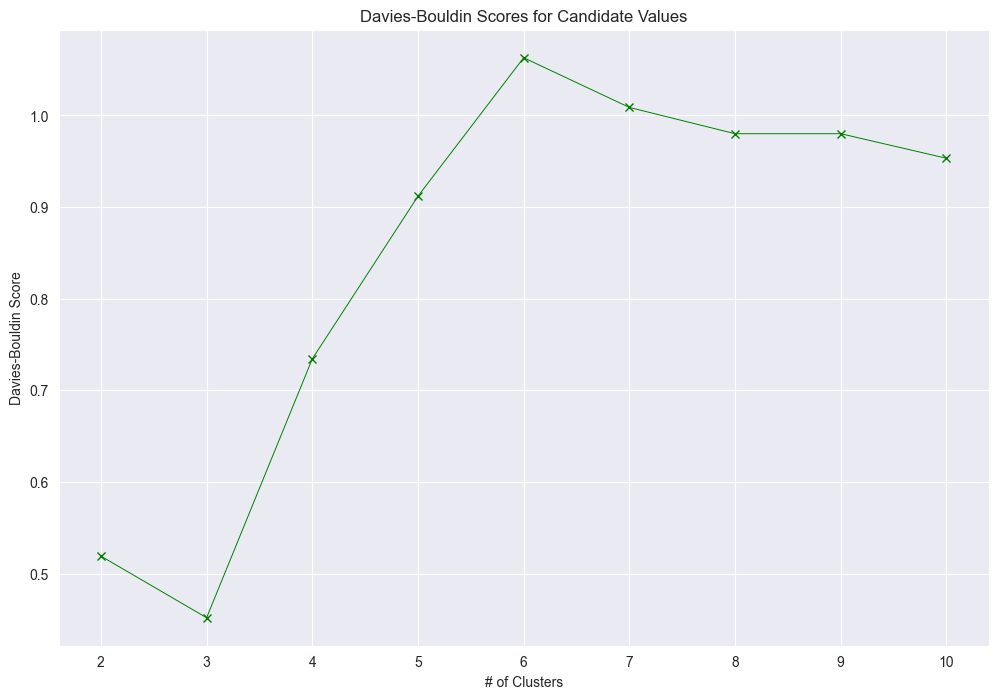

In [4]:
# Implement analytical methods to narrow the choice of K prior to modeling.
cluster_range = range(2,11)  # A range of 2 to 10 clusters in almost always an appropriate starting place
sil_scores = []  # Instantiate an empty list to store the silhouette scores
db_scores = [] # Instantiate an empty list to store the Davies-Bouldin scores

# Now, I can loop over the potential cluster values, fit the k-means algorithm for each, then calculate and plot the relevant scores
for candidate in cluster_range:
    cluster_model = KMeans(n_clusters=candidate, random_state=4)  # Setting random seed for reproducibility
    cluster_model.fit(df)
    cluster_label = cluster_model.labels_  # Store cluster labels for each candidate for plotting purposes
    
    # Compute silhouette scores for each candidate
    sil_avg = silhouette_score(df, cluster_label)  # Note that we're actually computing the mean of all silhouette scores, hence the semantics
    sil_scores.append(sil_avg)  # Add this mean value to the list for a given candidate model
    
    # Compute Davies-Bouldin scores for each candidate
    db_val = davies_bouldin_score(df, cluster_label)  # Compute db value for each candidate model
    db_scores.append(db_val)  # Append to the list for a given candidate model

# Create at least two different types of visualizations to evaluate possible values for the number of clusters. 
# Silhouette scores
plt.figure(figsize=(12, 8))
plt.plot(cluster_range, sil_scores, marker='o', lw=0.7, color='blue')
plt.title('Silhouette Scores for Candidate Models')
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)  # Set correct 'tick' values re: cluster_range
plt.grid(True)  # Apply grid
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(12, 8))
plt.plot(cluster_range, db_scores, marker='x', lw=0.7, color='green')  # Using a different marker and line color
plt.title('Davies-Bouldin Scores for Candidate Values')
plt.xlabel('# of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(cluster_range)  # Set correct 'tick' values re: cluster_range
plt.grid(True)  # Apply grid
plt.show()

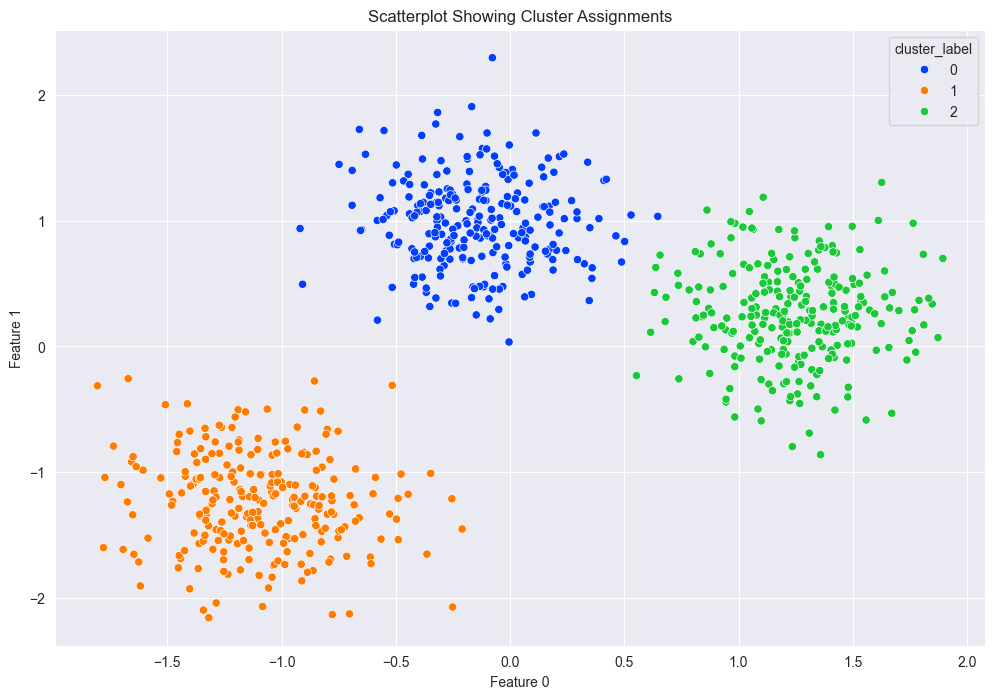

In [5]:
# Use scikit-learn to fit a basic k-means clustering model with random initialization and reproducible results.
kmeans_model = KMeans(n_clusters=3, random_state=4)  # Instantiate the model with 3 clusters and a specified random state for reproducibility
kmeans_model.fit(df)  # Fit the model to the dataframe
cluster_labels = kmeans_model.labels_  # Store cluster labels for plotting purposes
df['cluster_label'] = cluster_labels  # Add cluster labels to dataframe for plotting purposes

# Plot results which distinguish each of the clusters by color.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='0', y='1', hue='cluster_label', palette='bright')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatterplot Showing Cluster Assignments')  # Adding title
plt.show()

In [6]:
# Extract values for cluster centroids, the number of iterations to convergence, as well as a value that serves as a measure of cluster ‘coherence’.
# Note that these values can be 'extracted' because they're attributes of the cluster model
centroids = kmeans_model.cluster_centers_  # Fetch centroids
iters = kmeans_model.n_iter_  # Fetch number of iterations needed for convergence
inertia = kmeans_model.inertia_  # Fetch inertia value because it's a 'callable' attribute of the cluster model

# Print values
print(f'Cluster centroids: {centroids}')
print(f'Iterations required for convergence: {iters}')
print(f'Inertia value: {inertia}')

Cluster centroids: [[-0.14683618  0.98889946]
 [-1.09550672 -1.24100805]
 [ 1.24234291  0.25210859]]
Iterations required for convergence: 3
Inertia value: 163.32659893424147


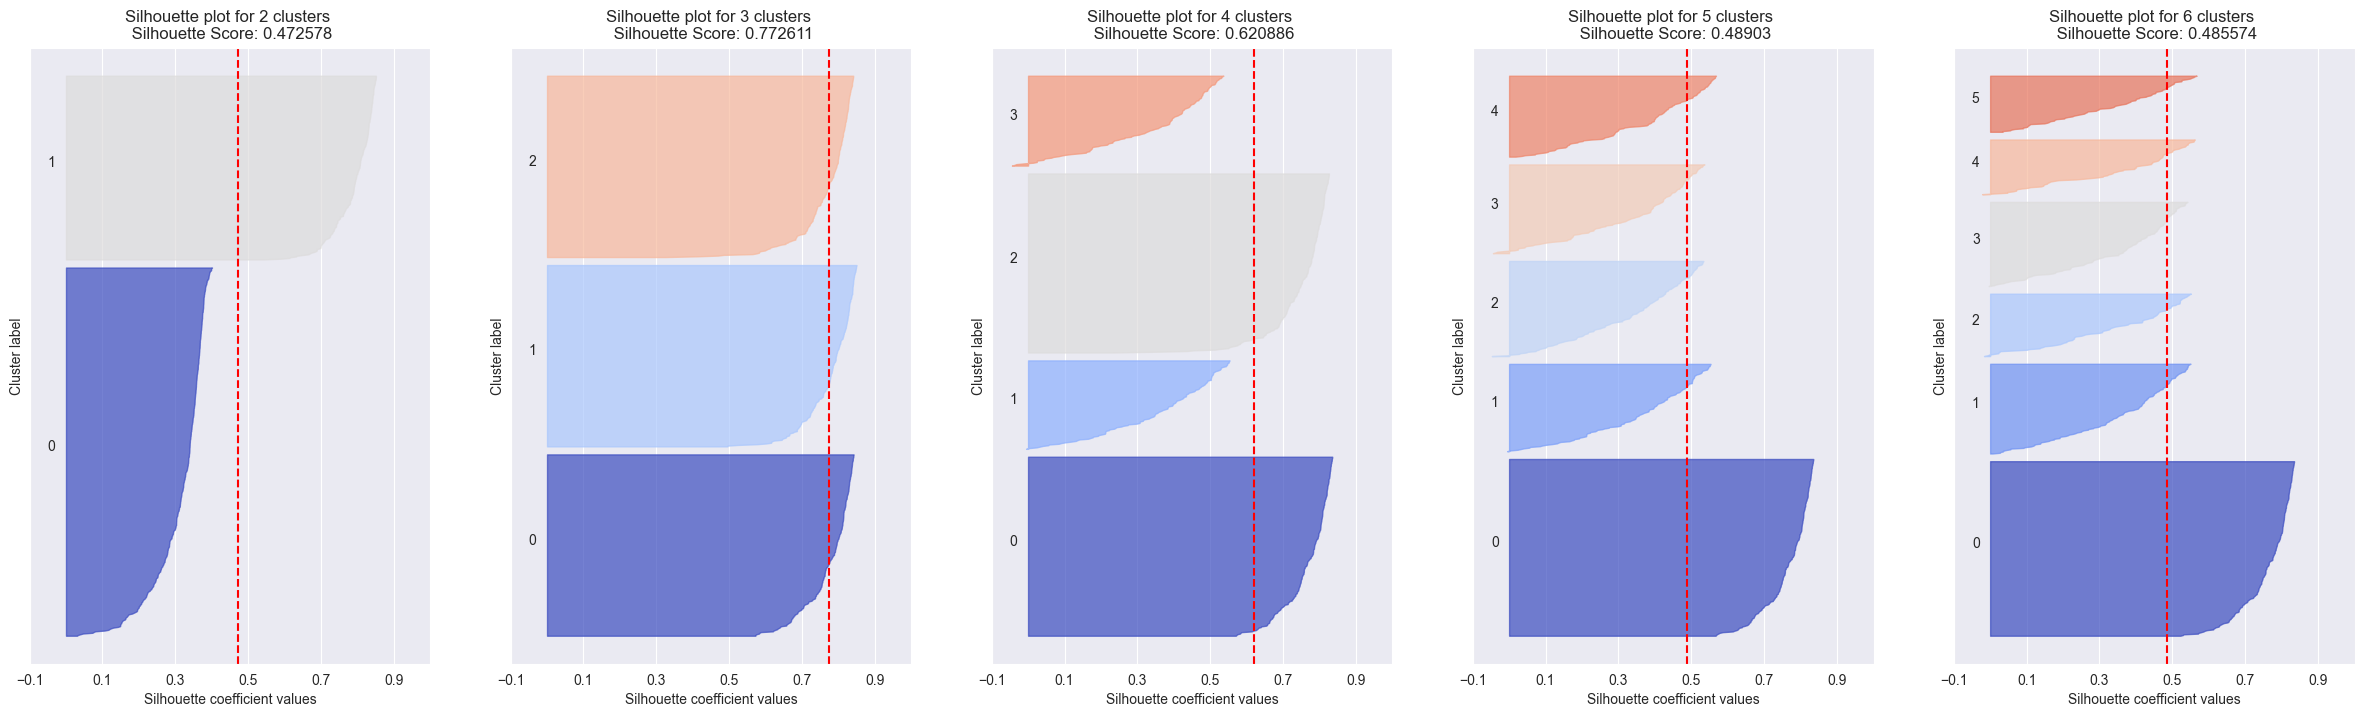

In [7]:
# Using the data and Kmeans model, create a set of silhouette plots (i.e., an appropriate range of k values) by adapting the provided code
range_n_clusters = [2, 3, 4, 5, 6]  # Range of values for k

plt.figure(figsize=(len(range_n_clusters) * 6, 8))

for i, n_clusters in enumerate(range_n_clusters):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)  # Initialize the clusterer
    cluster_labels = clusterer.fit_predict(df)
        
    silhouette_avg = silhouette_score(df, cluster_labels)  # Compute the silhouette scores
    sample_silhouette_values = silhouette_samples(df, cluster_labels)
    plt.subplot(1, len(range_n_clusters), i + 1)
    y_lower = 10
    
    for j in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        ith_cluster_silhouette_values.sort()
        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        color = matplotlib.colormaps['coolwarm'](float(j) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    plt.title(f'Silhouette plot for {n_clusters} clusters \n Silhouette Score: {round(silhouette_avg, 6)}')
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks([])
    plt.xticks(np.arange(-0.1, 1.1, 0.2))
    plt.xlim([-0.1, 1.0])
plt.show()

- The silhouette plot for three clusters (i.e. where k = 3) indicates that having three clusters is the best decision and affords the best cluster assignments. 
- This silhouette plot, when compared to the other candidate plots, has subplots of similar width and similar length, and all three subplots reach past the vertical red line in representing the average silhouette score for all observations given a specified number of clusters.
- This silhouette plot also has the highest overall silhouette score.

**External Validation**

   feature_1  feature_2  cluster_label
0  10.194350  -8.854231              3
1  -6.336913  -2.445506              4
2   2.806409  -4.933914              2
3   8.349684   2.859897              0
4   6.804985  -9.546410              3
5  10.108501   5.146429              1
6   3.983669  -8.271675              2
7  -5.915556  -1.220421              4
8  -4.107753  -0.367585              4
9  10.462264  -8.604002              3


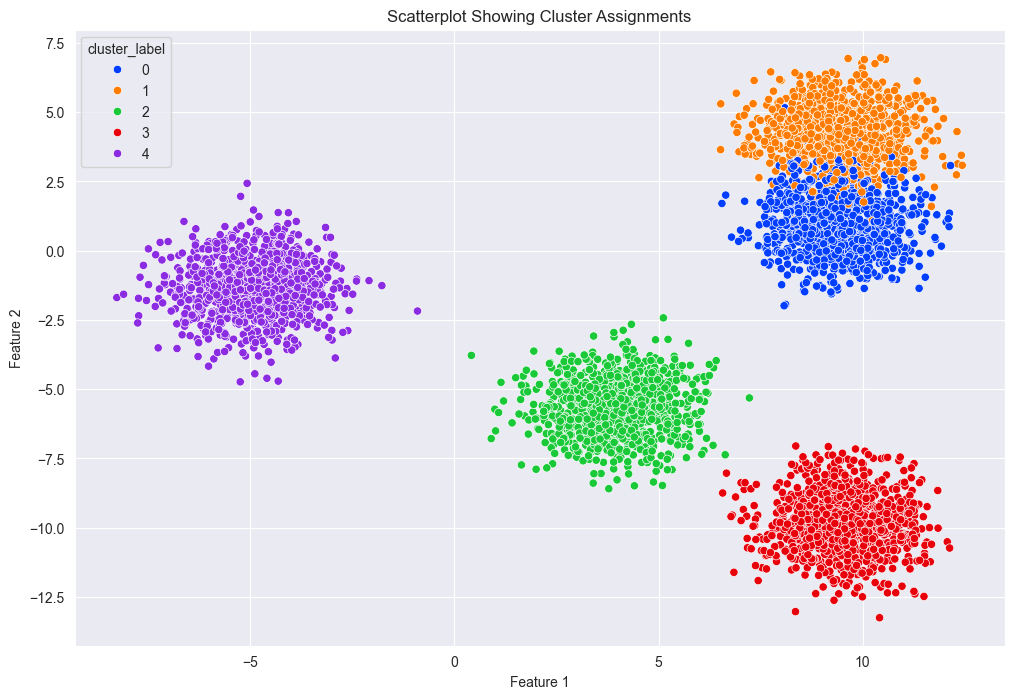

In [8]:
# Use sklearn’s ‘make_blobs’ to create a synthetic dataset for clustering with known labels.
# The data set should include 5 clusters with similar variance and number of observations, and 2 features. 
# Per sklearn dox, the function returns a tuple containing the samples and their labels. Hence the use of multiple assignment.
blob_data, cluster_labels = make_blobs(n_samples=5000, centers=5, n_features=2, random_state=4)

blob_df = pd.DataFrame(blob_data, columns=['feature_1', 'feature_2'])  # Convert to a pandas dataframe, assign feature names

blob_df['cluster_label'] = cluster_labels  # Add the labels to the dataframe as a new column
print(blob_df.head(10))

# Examining the scatterplot of the generated data, colored by label value
plt.figure(figsize=(12, 8))
sns.scatterplot(data=blob_df, x='feature_1', y='feature_2', hue='cluster_label', palette='bright')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatterplot Showing Cluster Assignments')  # Adding title
plt.show()

In [9]:
# Use Kmeans to fit the model and save the predicted cluster assignments for each of your observations.
# Note that it is not necessary to scale these data, because as per the sklearn dox, make_blobs generates features that are on the same scale (it draws from the standard Gaussian distribution for each cluster)
kmeans_blobs = KMeans(n_clusters=5, random_state=4)  # Instantiate a k-means clusterer with 5 clusters as per the prompt and a fixed random state
kmeans_blobs.fit(blob_df[['feature_1', 'feature_2']])  # Only fit k-means using the two features, not the known labels
blob_df['predicted_cluster'] = kmeans_blobs.labels_  # Store *predicted* cluster assignments in the dataframe
blob_df.head(10)  # Note that within the first ten rows we can see a few mismatches

,feature_1,feature_2,cluster_label,predicted_cluster
0,10.194350,-8.854231,3,3
1,-6.336913,-2.445506,4,0
2,2.806409,-4.933914,2,2
3,8.349684,2.859897,0,1
4,6.804985,-9.546410,3,3
5,10.108501,5.146429,1,1
6,3.983669,-8.271675,2,2
7,-5.915556,-1.220421,4,0
8,-4.107753,-0.367585,4,0
9,10.462264,-8.604002,3,3


Adjusted Rand Index Score: 0.954720


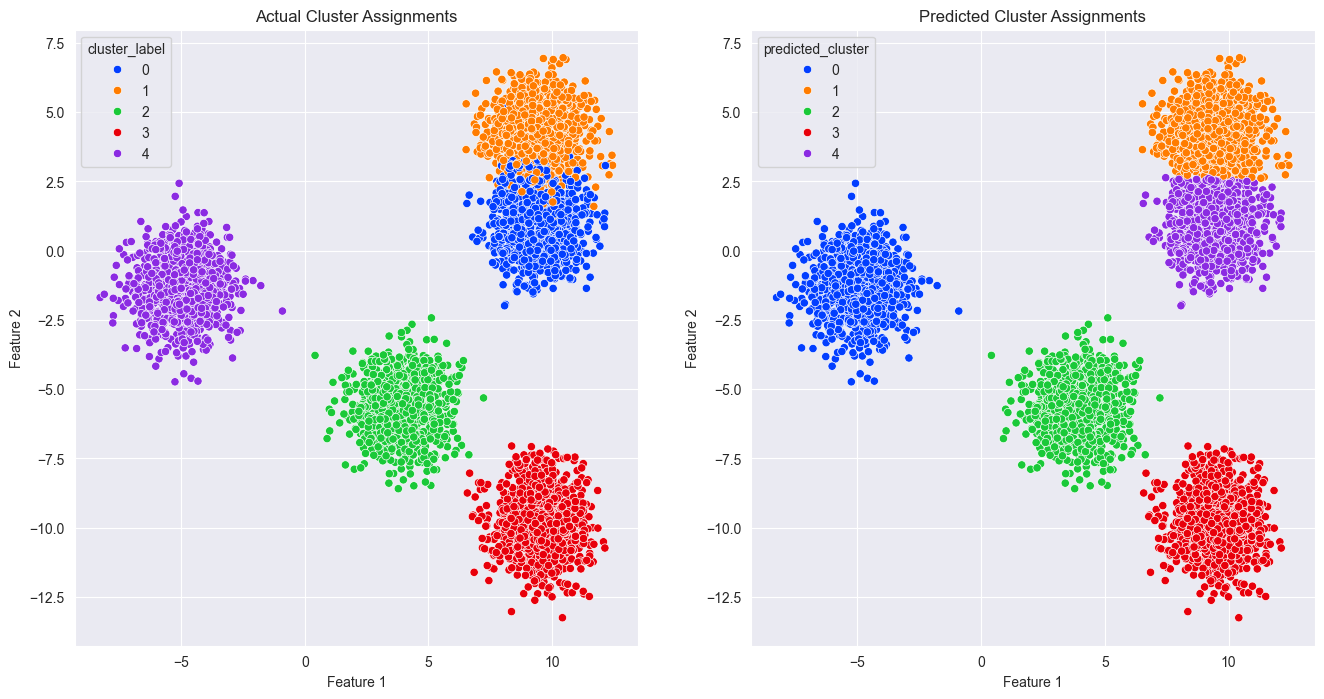

In [10]:
# Select and employ an appropriate analytical method to assess the degree of agreement between your predicted vs. actual cluster assignments – i.e., external validation. 
# Calculate Adjusted Rand Index score (ARI)
ari_score = adjusted_rand_score(blob_df['cluster_label'], blob_df['predicted_cluster'])
print(f'Adjusted Rand Index Score: {ari_score:.6f}')  # Round to six decimal places

# Create scatterplots for both predicted and actual cluster assignments using matplotlib’s subplot() method.
fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # One row and two columns of plots with identical sizes

# Scatter plot for predicted cluster assignments
sns.scatterplot(ax=axs[1], data=blob_df, x='feature_1', y='feature_2', hue='predicted_cluster', palette='bright')
axs[1].set_title('Predicted Cluster Assignments')  # Set appropriate title
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

# Scatter plot for actual cluster assignments
sns.scatterplot(ax=axs[0], data=blob_df, x='feature_1', y='feature_2', hue='cluster_label', palette='bright')
axs[0].set_title('Actual Cluster Assignments')  # Set appropriate title
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

plt.show()

Per the sklearn dox and Stack Overflow, ARI has several advantages over the 'ordinary' rand index metric:
- ARI corrects for the chance grouping of elements - it provides a better measure of how accurate the clustering is compared to a fully random clustering.
- ARI ranges from -1 to 1 such that 0 indicates random labeling, 1 indicates that the clusterings are exactly-matched (i.e. a 'perfect result'), and negative values indicate that the matching is worse than random. It is therefore easy to interpret.
- ARI is more robust to variance in dataset size and numbers of clusters.
- The ARI value returned from my model was 0.954720.
- This result is very close to the 'optimal' value of 1, indicating a high match rate between the predicted cluster assignments from the k-means model and the known cluster labels from the dataset. 
- This implies that the k-means model accurately identified and assigned the majority of the observations to the correct clusters. Only a small group of observations was not correctly grouped by the k-means model.
- This result is visually reinforced by the scatter plots comparing actual and predicted cluster assignments. Apart from an arbitrary variance in terms of which cluster was assigned to which color, the accurate matching of predicted and actual clusters is evident.

**Local and Global Objective Functions**
1. For the following sets of two-dimensional points, show how they would be split into clusters by K-means for the given number of clusters, and indicate approximately where the resulting centroids would be. 
2. Assume that we are using the squared error objective function.

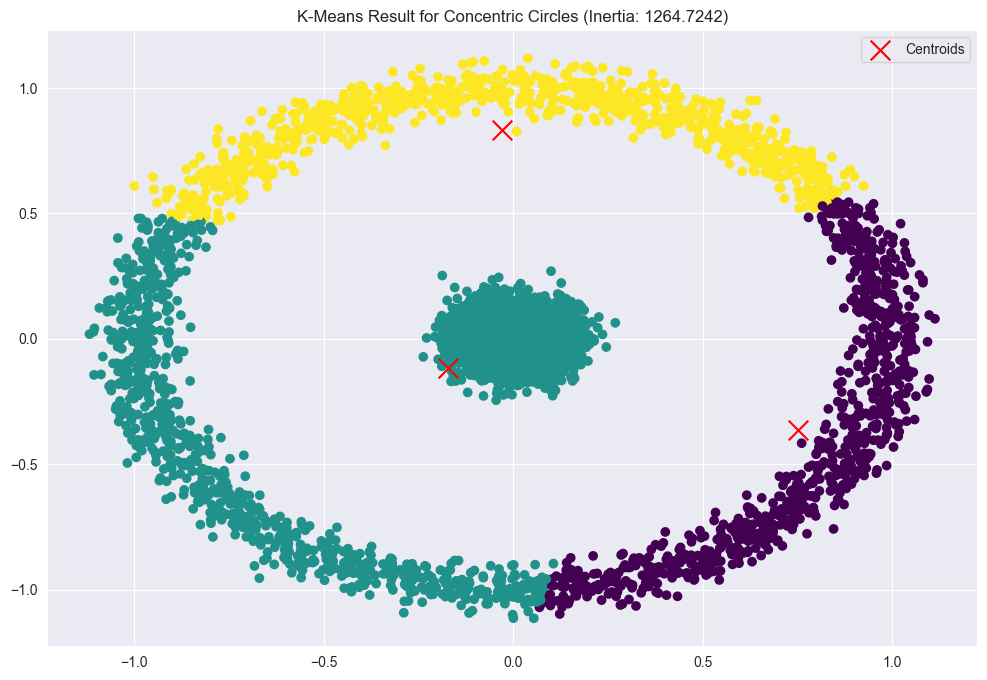

In [11]:
# Where k = 3
# Using sklearn's make_circles function to generate a representative dataset
X, _ = make_circles(n_samples=5000, factor=0.1, noise=0.05)  # 1000 points with low noise. We 'throw away' the y labels using '_' because we don't want to pre-define the classes

kmeans_circles = KMeans(n_clusters=3, random_state=4)  # Fit the K-Means clustering algorithm with three clusters and a fixed random state
cluster_labels = kmeans_circles.fit_predict(X)  # Generate cluster labels
inertia = kmeans_circles.inertia_
# Because we used make_circles, we do not need to scale the data

# Plot the data points with their cluster assignments
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
centroids = kmeans_circles.cluster_centers_  # Fetch the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='r', marker='x', label='Centroids')  # Plot the centroids as red 'X' markers
plt.title(f'K-Means Result for Concentric Circles (Inertia: {inertia:.4f})')
plt.legend()
plt.show()

- In essence, what we have here is the 'outer circle' split into three clusters, with the 'inner circle' belonging to one of the three clusters. 
- Which cluster the 'inner circle' belongs to changes as you re-run the clustering algorithm. 
- The centroid of the cluster containing the 'inner circle' is of course pulled toward the middle of the plot.

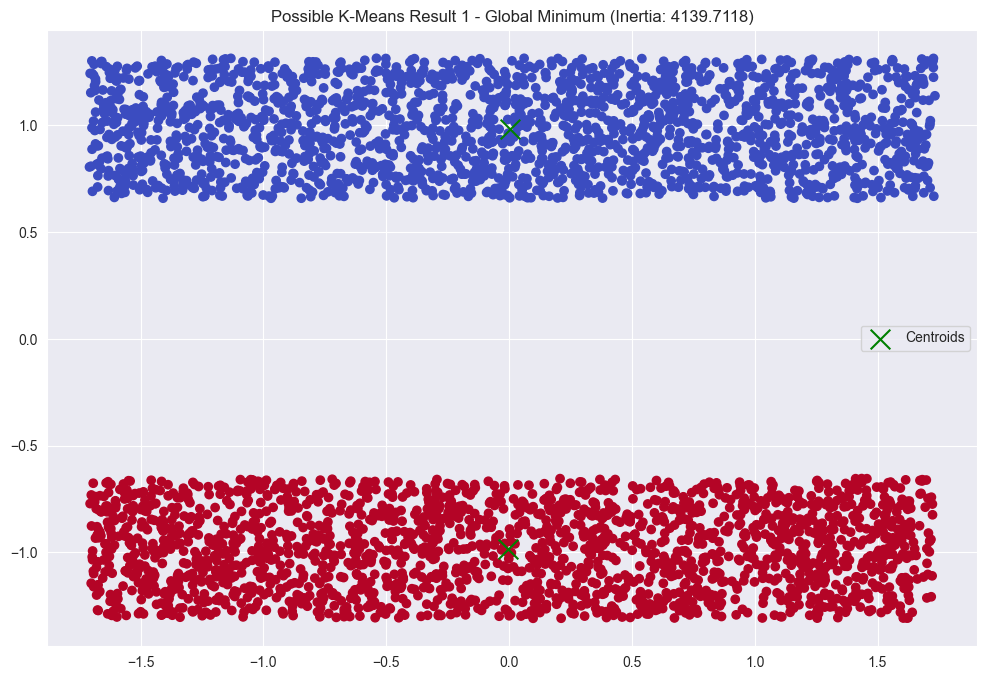

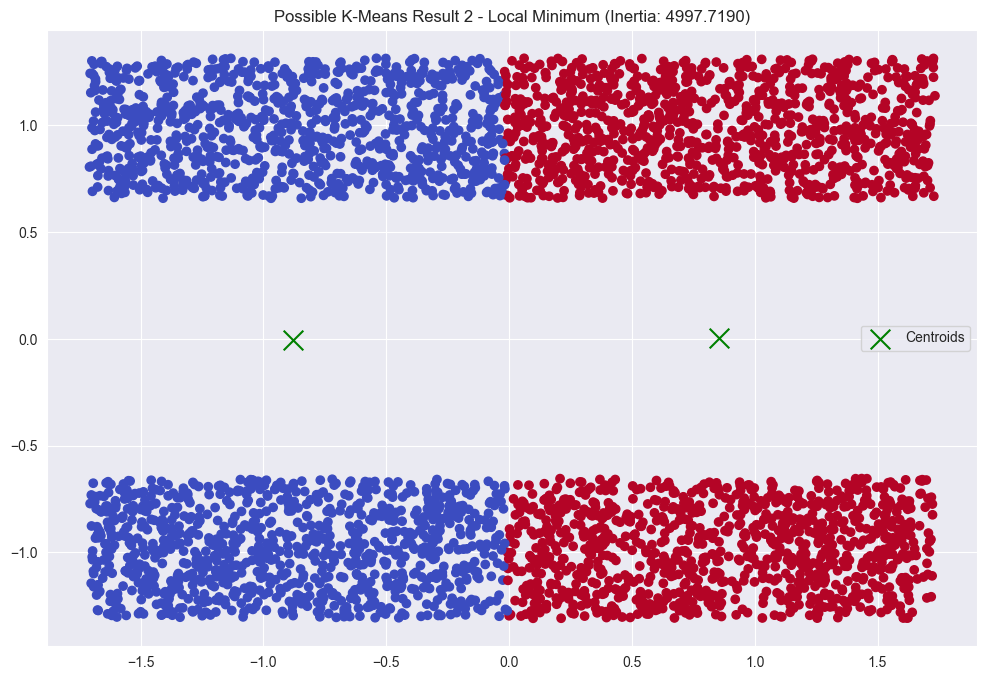

In [31]:
# Where k = 2
def build_bar_data():
    x_values = [random.uniform(-1, 1) for _ in range(4000)]  # Common x values to keep the bars parallel in the x-frame
    y1_values = [random.uniform(1, 2) for _ in range(2000)]  # First set of y values
    y2_values = [random.uniform(4, 5) for _ in range(2000)]  # Second set of y values
    
    y_values = y1_values + y2_values  # Concatenate the y values
    
    bar_data = pd.DataFrame({'x': x_values, 'y': y_values})  # Generate pandas dataframe
    
    return bar_data


bar_points = build_bar_data()  # Call the function to build the 'two bars' dataframe

# Scale the data in preparation for k-means
scaler = StandardScaler()
scaled_data = scaler.fit_transform(bar_points[['x', 'y']].values)

# Convert the scaled data back into to a dataframe
scaled_df = pd.DataFrame(scaled_data, columns=['x', 'y'])

kmeans_bars = KMeans(n_clusters=2, random_state=4)  # Fit the K-Means clustering algorithm with two clusters and a fixed random state
cluster_labels = kmeans_bars.fit_predict(scaled_df)  # Generate cluster labels
inertia_1 = kmeans_bars.inertia_  # Fetch and store the inertia score

# Plot the data points with their cluster assignments
plt.figure(figsize=(12, 8))
plt.scatter(scaled_df['x'], scaled_df['y'], c=cluster_labels, cmap='coolwarm')
centroids = kmeans_bars.cluster_centers_  # Fetch the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='g', marker='x', label='Centroids')  # Plot the centroids as green 'X' markers
plt.title(f'Possible K-Means Result 1 - Global Minimum (Inertia: {inertia_1:.4f})')
plt.legend()
plt.show()

kmeans_bars = KMeans(n_clusters=2, random_state=44)  # Fit the K-Means clustering algorithm with two clusters and a different fixed random state
cluster_labels = kmeans_bars.fit_predict(scaled_df)  # Generate cluster labels
inertia_2 = kmeans_bars.inertia_  # Fetch and store the inertia score

# Plot the data points with their cluster assignments
plt.figure(figsize=(12, 8))
plt.scatter(scaled_df['x'], scaled_df['y'], c=cluster_labels, cmap='coolwarm')
centroids = kmeans_bars.cluster_centers_  # Fetch the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='g', marker='x', label='Centroids')  # Plot the centroids as green 'X' markers
plt.title(f'Possible K-Means Result 2 - Local Minimum (Inertia: {inertia_2:.4f})')
plt.legend()
plt.show()

- There are two solutions here: the global solution (the upper plot), which divides the two bars more 'cleanly' (maintaining a total separation between the two 'known' clusters, given how we built the data), and a local solution (the lower plot) which divides the points into two clusters but does *not* match the correct separation between the 'known' clusters. 
- The centroids generated by the local solution are also less reflective of the actual state of the data. 
- This is an example of how the k-means algorithm can settle on a mathematically defensible but conceptually suboptimal solution, given the value of K passed to the algorithm.

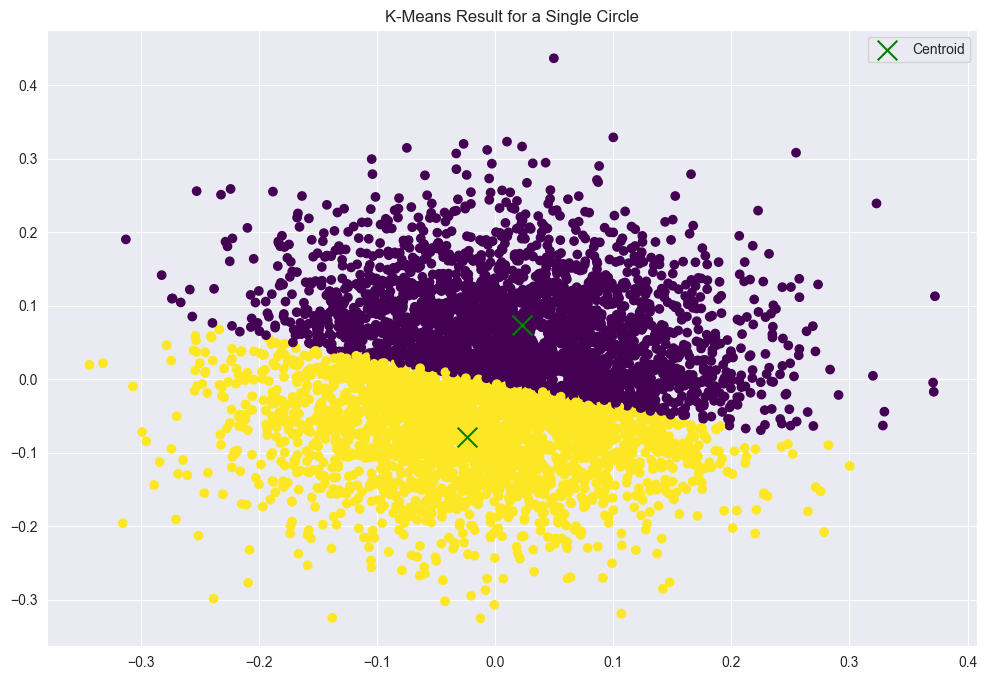

In [13]:
# Where k = 2
# Generate the circles of points
X, y = make_circles(n_samples=10000, noise=0.1, factor=0)

# Keep only the points from the 'inner' circle
X = X[y == 1]

# Because we used make_circles, we do not need to scale the data

# Fit the K-Means clustering algorithm with two clusters
kmeans_circle = KMeans(n_clusters=2, random_state=4)
cluster_labels = kmeans_circle.fit_predict(X)

# Plot the data points with their cluster assignments
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
centroids = kmeans_circle.cluster_centers_  # Fetch the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='g', marker='x', label='Centroid')  # Plot the centroids as green 'X' markers
plt.title('K-Means Result for a Single Circle')
plt.legend()
plt.show()

- Note that we're extremely 'zoomed in' on the circle. 
- Nonetheless, the k-means algorithm functions as expected, that is to say, not particularly well. 
- A single, equally-dense circle of points, when separated by k-means into two clusters, will logically be divided pretty much exactly in half, with the centroids appearing in the 'middle' of each half.
- It's worth noting that this clustering approach (k-means on a single circle, with two clusters) doesn't make much sense. 
- A single circle of points has no distinct groups that would justify splitting it into two clusters.
- This is because a uniformly-dense circle *is a circle* - the points are uniformly distributed around the circle's circumference and across the circle's diameter.
- So, given that k-means makes the assumption that clusters exist in the data, and clearly in this instance they do not, the results we get are not meaningful.

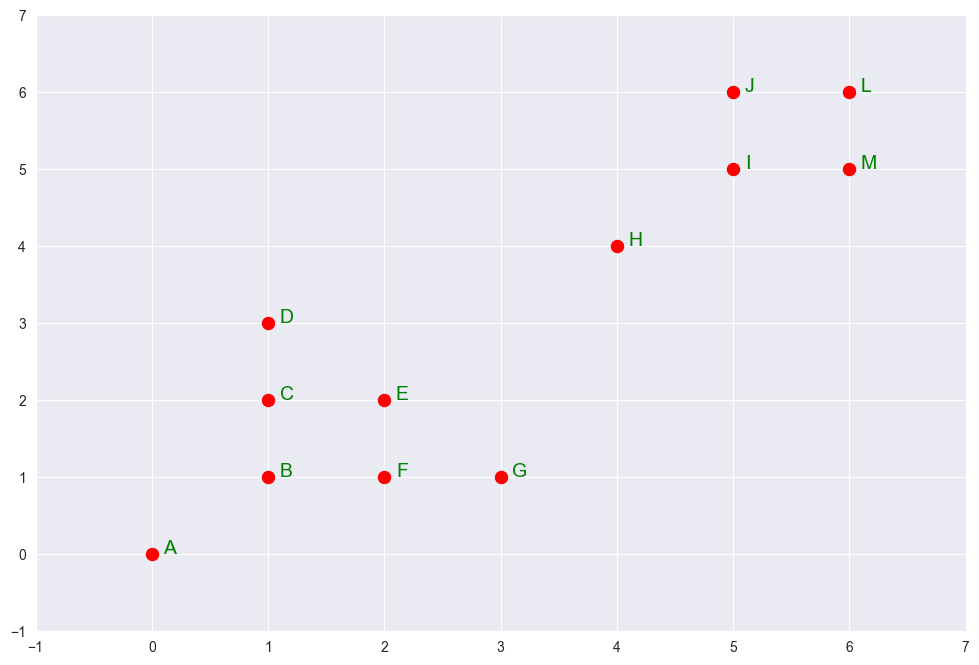

In [14]:
# Density Clustering
# Given a dataset expressed as labeled points on the x-y plane, cluster it using DBSCAN and Euclidean distance
def make_points_data():
    # Define a dictionary containing each point's label and coordinates
    points = {
        'A': [0, 0],
        'B': [1, 1],
        'C': [1, 2],
        'D': [1, 3],
        'E': [2, 2],
        'F': [2, 1],
        'G': [3, 1],
        'H': [4, 4],
        'I': [5, 5],
        'J': [5, 6],
        # Note that there is no point 'K' in the plot
        'L': [6, 6],
        'M': [6, 5]
    }
    
    # Create a Pandas dataframe via dictionary comprehension using the dictionary defined above
    df = pd.DataFrame.from_dict(
        {'label': list(points.keys()),  # The keys are the column labels
        'x': [coordinate[0] for coordinate in points.values()],  # The x coordinates are the first item at index 0
        'y': [coordinate[1] for coordinate in points.values()]},  # The y coordinates are the second item at index 1
        orient='columns')  # Use keys as column names
    
    return df


point_df = make_points_data()

plt.figure(figsize=(12, 8))
plt.scatter(point_df['x'], point_df['y'], s=75, color='red')
for index, row in point_df.iterrows():  # Add on-plot labels for each point
    plt.text(row['x'] + 0.1, row['y'], row['label'], color='green', fontsize=14) # Each label needs a slight offset
plt.grid(True)  # Enable grid
# Set axis bounds to mimic the prompt
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.show()

   label  cluster point_type
0      A       -1      Noise
1      B        0       Core
2      C        0       Core
3      D        0   Boundary
4      E        0       Core
5      F        0       Core
6      G        0   Boundary
7      H       -1      Noise
8      I        1       Core
9      J        1       Core
10     L        1       Core
11     M        1       Core


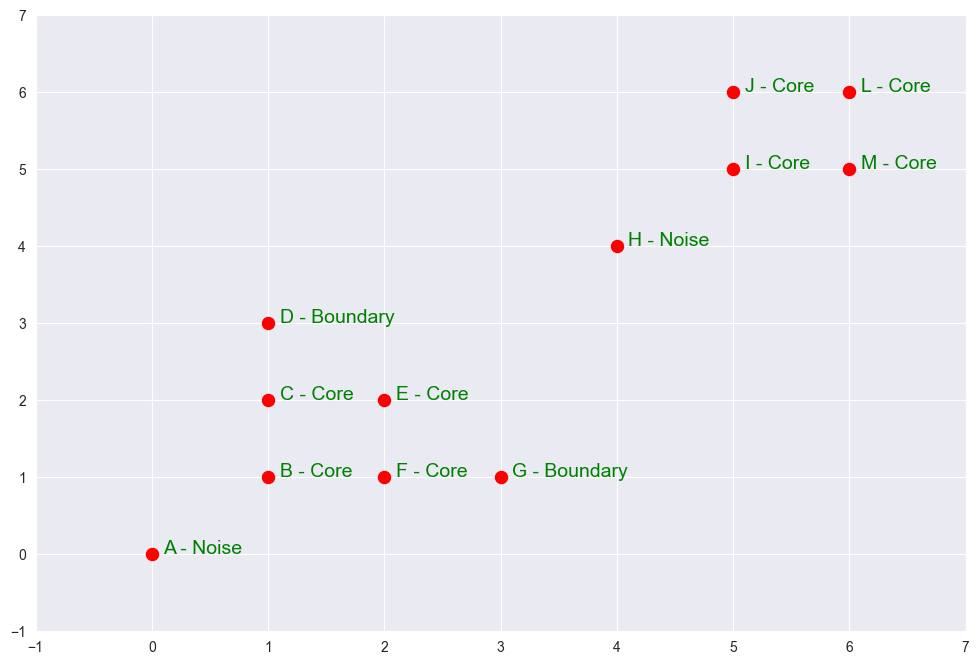

In [15]:
# Now, suppose we apply DBSCAN to cluster this dataset, using Euclidean distance.
# A point is a 'core point' if its density (num point within EPS) is >= MinPts.
# Given that MinPts = 3 and EPS = 1, answer the following questions:
# 1. Label all points appropriately as ‘core points’, ‘boundary points’, or ‘noise.’
# 2. What is the clustering result (i.e. how will the data cluster?)

# To classify each point as 'core,' 'boundary,' or 'noise,' I will implement DBSCAN and create appropriate labels for each point based on the results
X = point_df[['x', 'y']].values  # Per sklearn dox, DBSCAN cannot accept a dataframe as input and requires a 2D point array

dbscan = DBSCAN(eps=1, min_samples=3)  # Instantiate a DBSCAN clusterer with eps=1 and min_samples=3
point_df['cluster'] = dbscan.fit_predict(X)  # Run DBSCAN and assign the cluster labels for each point into the dataframe

# Initialize a boolean array which initially is filled with 'False' boolean values - initially, all points are classed as False, i.e. 'not core'
core_points_bool = np.zeros_like(dbscan.labels_, dtype=bool)
# Change the boolean classification to True (i.e. 'core') at all index values for points classified as 'core' by DBSCAN
core_points_bool[dbscan.core_sample_indices_] = True
point_df['is_core'] = core_points_bool  # Add a column for boolean identification of core points to the dataframe

point_df['point_type'] = 'Noise'  # Add a column for point type, and initialize all values as 'noise' - parallel process to lines 13-17
point_df.loc[point_df['is_core'], 'point_type'] = 'Core'  # For all points classified as 'core,' update their values in 'point_type'
# The 'boundary' classification step requires a bit more explanation
# All points classed as 'noise' are stored in cluster -1, which is essence means they're not in a cluster
# All points which are not in cluster -1 (i.e. are not noise) but are also not classed as 'core' are therefore boundary points
# The hard-to-follow stuff in the next line is a few bitwise operations - a point is a 'boundary' point if 'cluster' != -1 AND has a False value in 'is_core' 
point_df.loc[(point_df['cluster'] != -1) & (~point_df['is_core']), 'point_type'] = 'Boundary'

# Display the DataFrame with labels, cluster assignments, and point types
print(point_df[['label', 'cluster', 'point_type']])

# Now create a plot which matches the prompt as exactly as possible
plt.figure(figsize=(12, 8))
plt.scatter(point_df['x'], point_df['y'], s=75, color='red')
for index, row in point_df.iterrows():  # Add on-plot labels for each point
    plt.text(row['x'] + 0.1, row['y'], f"{row['label']} - {row['point_type']}", color='green', fontsize=14) # Each label needs a slight offset
plt.grid(True)  # Enable grid
# Set axis bounds to mimic the prompt
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.show()  # Resulting plot has labels and classifications for each point

**The result is that the data have been grouped into two clusters, labeled 0 and 1 by the DBSCAN algorithm. There are two boundary points and two noise points.**

**Selecting Appropriate Clustering Algorithms**

1. Import the x4_vals.npy dataset
2. Conduct an initial EDA to evaluate the data. 
3. Create at least two different types of visualizations to evaluate possible values for K.
4. Parameterize and implement the following clustering algorithms using this dataset:
    1. Kmeans 
    2. Gaussian Mixture Model 
    3. DBSCAN 
    4. Agglomerative Hierarchical
5. Create a plot of the results for each algorithm which distinguishes clusters by color.
6. Select the algorithm/parameters that provides the best clustering results.

Head: [[-2.50582765  4.23142098]
 [-2.01503071  2.57790164]
 [-0.77873172  3.73600103]
 [-1.525042    2.95045747]
 [-0.61968656  2.70325243]]

Maximum values: [10.71795942  8.67024007]

Minimum values: [-3.5648868   0.16653661]


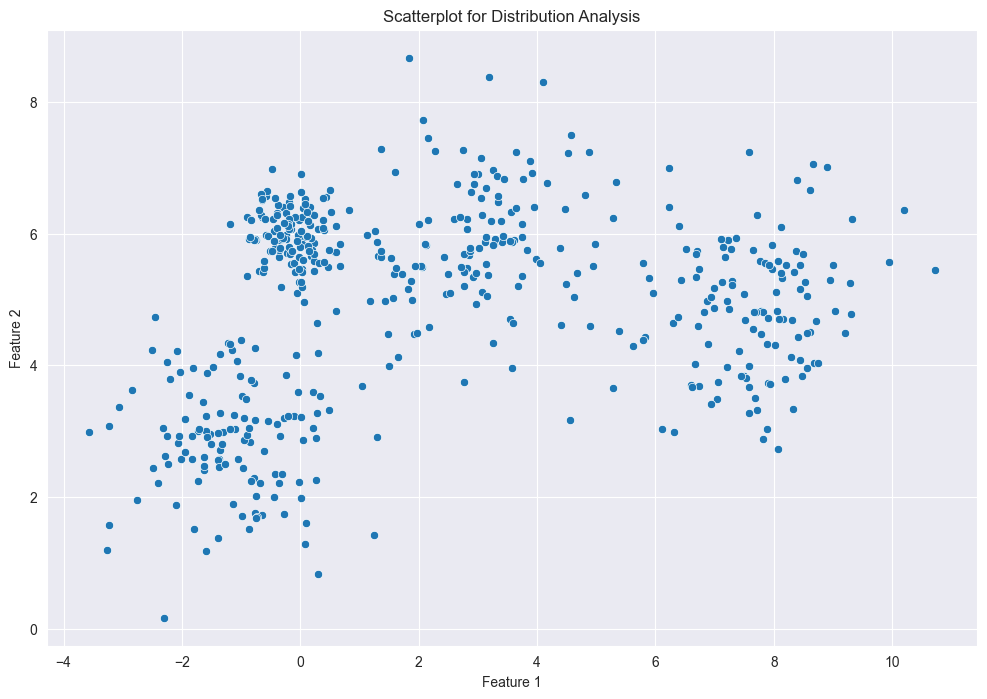

In [16]:
# 1: Import data
data = np.load('x4_vals.npy')

# 2: EDA evaluation
print(f'Head: {data[:5]}')  # Print 'head' of data. We have two columns of float-type numbers.
print()
print(f'Maximum values: {np.max(data, axis=0)}')  # No values larger than 10.71
print()
print(f'Minimum values: {np.min(data, axis=0)}')  # There are negative values in the data
print()

df = pd.DataFrame(data, columns=['feature_1', 'feature_2'])  # Storing data as pandas dataframe for convenience. Ensuring column names are strings.

# Scatterplot to evaluate general appearance of data
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='feature_1', y='feature_2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatterplot for Distribution Analysis')  # Adding title
plt.show()

# Nothing obvious leaps out apart from the one obvious cluster in the upper left.
# Broadly, from a first-principles visual inspection, I would guess that there are four clusters.

In [17]:
# Evaluate possible values for k
# Instantiate empty arrays to store metric scores
sil = np.empty((0, 7))
db = np.empty((0, 7))
bic_aic = np.empty((0, 3))

for k in np.arange(2, 21, 1, dtype= int):  # For all candidate k values
    
    kmeans = KMeans(n_clusters= k, n_init= 10).fit(df)  # Fit k-means models
    kmeans_labels = kmeans.labels_  # Store labels
    
    gm = GaussianMixture(n_components= k).fit(df)  # Fit GM models
    gm_labels = gm.predict(df)  # Run predictions and store labels
    
    # Instantiate empty arrays for linkage-based Silhouette and Davies-Bouldin scores
    sil_by_linkage = np.empty(0)
    db_by_linkage = np.empty(0)
    
    for link in ['ward', 'single', 'complete', 'average']:  # For each linkage option/cnadidate
        agglo = AgglomerativeClustering(n_clusters= k, linkage= link).fit(df)  # Fit an agglomerative clusterer
        agglo_labels = agglo.labels_  # Store labels

        sil_by_linkage = np.append(sil_by_linkage, silhouette_score(X= df, labels= agglo_labels))  # Calculate and append silhouette score
        db_by_linkage = np.append(db_by_linkage, davies_bouldin_score(X= df, labels= agglo_labels))  # Calculate and append Davies-Bouldin score

    # Aggregate silhouette scores across the models
    sil = np.vstack([sil, 
                     np.append(
                         np.array([k,
                                   silhouette_score(X= df, labels= kmeans_labels), 
                                   silhouette_score(X= df, labels= gm_labels)
                                  ]),
                         sil_by_linkage)
                    ])

    # Aggregate Davies-Bouldin scores across the models
    db = np.vstack([db, 
                    np.append(
                        np.array([k,
                                  davies_bouldin_score(X= df, labels= kmeans_labels),
                                  davies_bouldin_score(X= df, labels= gm_labels)
                                 ]),
                        db_by_linkage)
                   ])

    # Aggregate BIC and AIC scores for the GM models
    bic_aic = np.vstack([bic_aic, np.array([k, gm.bic(df), gm.aic(df)])]) 

# Create 'leaderboards' for the quantitative metrics
silhouette_leaderboard = pd.DataFrame(sil, columns= ['k', 'kmeans', 'gmm', 'agg_ward', 'agg_single', 'agg_complete', 'agg_average',])    

davies_bouldin_leaderboard = pd.DataFrame(db, columns= ['k', 'kmeans', 'gmm', 'agg_ward', 'agg_single', 'agg_complete', 'agg_average',])    

In [18]:
# Helper functions
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    from matplotlib.patches import Ellipse
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle=angle, **kwargs))

def plot_gmm(gmm, X, label= True, ax= None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=1)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.3 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor, ax= ax)

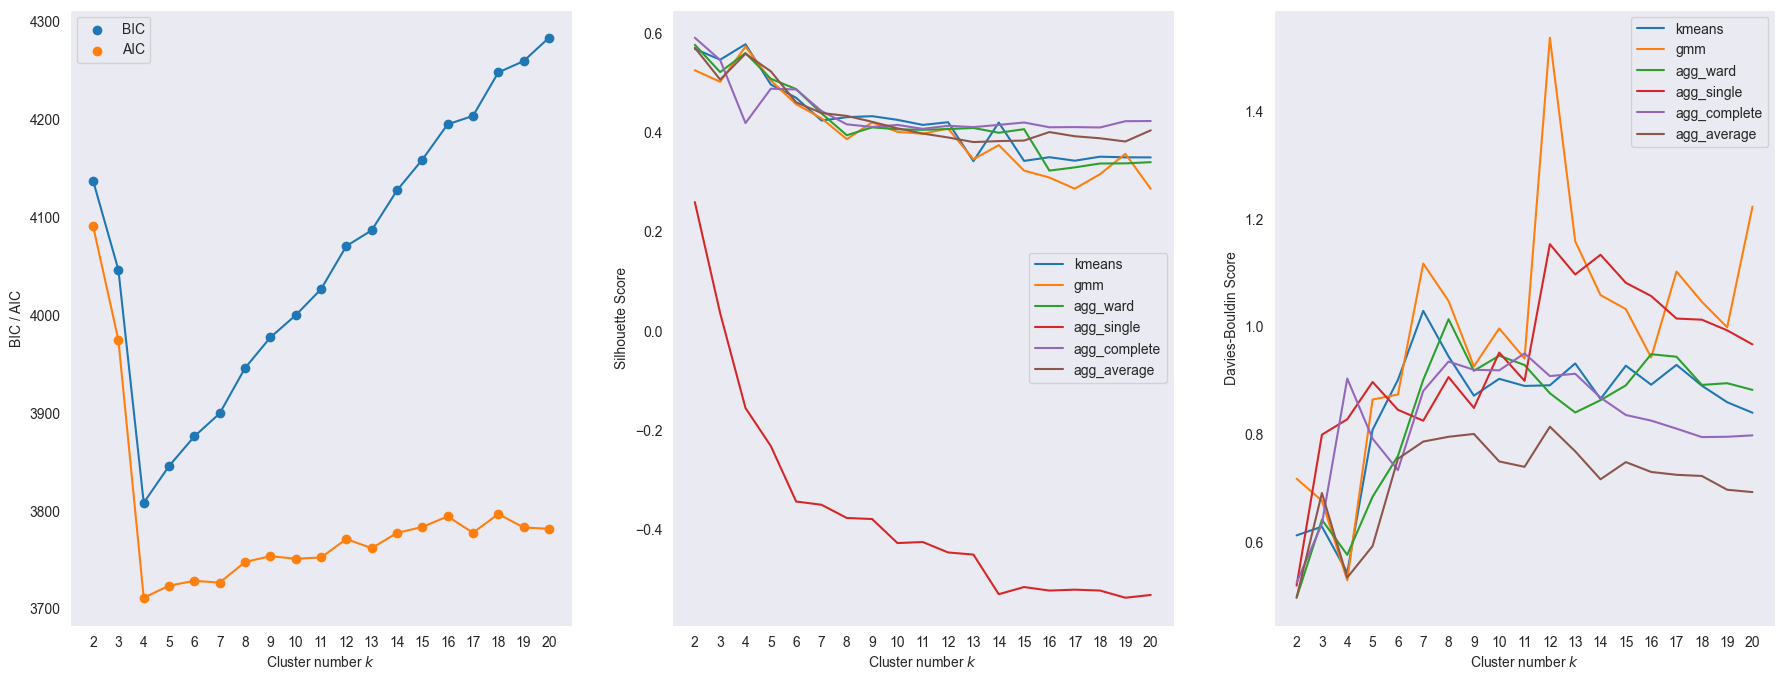

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows= 1, ncols= 3, figsize= (22, 8))  # Set tiled plot structure

# Define plots
# Information criteria plots
ax1.scatter(x= bic_aic[:, 0], y= bic_aic[:, 1], label= 'BIC')
ax1.plot(bic_aic[:, 0], bic_aic[:, 1])
ax1.scatter(x= bic_aic[:, 0], y= bic_aic[:, 2], label= 'AIC')
ax1.plot(bic_aic[:, 0], bic_aic[:, 2])
ax1.set_xlabel('Cluster number $k$')
ax1.set_ylabel('BIC / AIC')
ax1.grid()
ax1.set_xticks(ticks= np.arange(2, 21, 1))
ax1.legend()

# Silhouette plots
silhouette_leaderboard.drop(columns= ['k']).plot(ax= ax2)
ax2.set_xlabel('Cluster number $k$')
ax2.set_ylabel('Silhouette Score')
ax2.grid()
ax2.set_xticks(ticks= np.arange(0, silhouette_leaderboard.shape[0], 1), labels= np.arange(silhouette_leaderboard.k.min(), silhouette_leaderboard.k.max()+1, dtype= int))
ax2.legend()

# Davies-Bouldin plots
davies_bouldin_leaderboard.drop(columns= ['k']).plot(ax= ax3)
ax3.set_xlabel('Cluster number $k$')
ax3.set_ylabel('Davies-Bouldin Score')
ax3.set_xticks(ticks= np.arange(0, davies_bouldin_leaderboard.shape[0], 1), labels= np.arange(davies_bouldin_leaderboard.k.min(), davies_bouldin_leaderboard.k.max()+1, dtype= int))
ax3.grid()
ax3.legend()

plt.show()

In [20]:
# Best k and method from Silhouette leaderboard
opt_locs = np.where(silhouette_leaderboard == silhouette_leaderboard.drop(columns= 'k').max().max())
optimal_ks = np.unique(opt_locs[0])
optimal_algo = np.unique(opt_locs[1])
silhouette_leaderboard.iloc[optimal_ks][np.append('k', silhouette_leaderboard.columns[optimal_algo].values)]

,k,agg_complete
0,2.0,0.590039


In [21]:
# Best k and method from Davies-Bouldin leaderboard
opt_locs = np.where(davies_bouldin_leaderboard == davies_bouldin_leaderboard.drop(columns= 'k').min().min())
optimal_ks = np.unique(opt_locs[0])
optimal_algo = np.unique(opt_locs[1])
davies_bouldin_leaderboard.iloc[optimal_ks][np.append('k', davies_bouldin_leaderboard.columns[optimal_algo].values)]

,k,agg_ward
0,2.0,0.497008


In [22]:
# Best k from Gaussian Mixture Information Criteria
print(f'BIC: {bic_aic[bic_aic[:, 1].argmin()]}')
print(f'AIC: {bic_aic[bic_aic[:, 2].argmin()]}')

BIC: [   4.         3808.09224327 3711.15625701]
AIC: [   4.         3808.09224327 3711.15625701]


In [23]:
# 4: Retrain models with optimum k values
kmeans = KMeans(n_clusters= 2, n_init= 10).fit(df[['feature_1', 'feature_2']])  # k=2 from Silhouette leaderboard
df['km_label'] = kmeans.labels_

agglo = AgglomerativeClustering(n_clusters= 2, linkage= 'ward').fit(df[['feature_1', 'feature_2']])  # k=2 and Ward linkage from D-B leaderboard
df['agg_label'] = agglo.labels_

gmm = GaussianMixture(n_components= 4).fit(df[['feature_1', 'feature_2']])  # k=4 from BIC/AIC leaderboard
df['gm_label'] = gmm.predict(df[['feature_1', 'feature_2']])

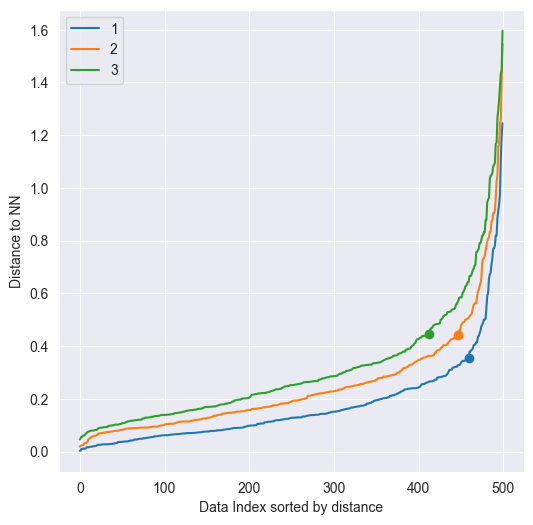

In [24]:
# Nearest neighbor calculations
neighbors = 3
nbrs = NearestNeighbors(n_neighbors= neighbors + 1).fit(df)
distances, indices = nbrs.kneighbors(df)
distances= np.sort(distances, axis= 0)


opt_esp_minpts = np.empty((0, 2))
plt.figure(figsize= (6, 6))
for n in np.arange(1, neighbors + 1):
    
    lndf = np.linspace(start= distances[0, n], stop= distances[-1, n], num= int(distances.shape[0]))

    distA = np.concatenate([np.arange(1, distances.shape[0] + 1) / distances.shape[0], distances[:, n]]).reshape(2, -1).T
    distB = np.concatenate([np.arange(1, lndf.shape[0] + 1) / lndf.shape[0], lndf]).reshape(2, -1).T

    all2all = cdist(XA = distA, XB= distB)
    idx_opt = all2all.min(axis= 1).argmax()
    
    opt_esp_minpts = np.vstack([opt_esp_minpts, np.array([n, distances[idx_opt, n]])]) 
    
    plt.plot(distances[:, n], label= n)
    plt.scatter(x= idx_opt, y= distances[idx_opt, n])
    
plt.legend()
plt.xlabel('Data Index sorted by distance')
plt.ylabel('Distance to NN')
plt.show()

In [25]:
# Tuning DBSCAN
dbscan = DBSCAN(min_samples= int(opt_esp_minpts[-1, 0] + 1), eps= opt_esp_minpts[-1, 1] + 0.01).fit(df[["feature_1", "feature_2"]])
df['dbs_label'] = dbscan.labels_
dbs_cluster_lbls, dbs_cluster_cnts = np.unique(df.dbs_label, return_counts= True)
dbs_clusters = dict(zip(dbs_cluster_lbls, dbs_cluster_cnts))

df_dbscan = df[df.dbs_label != -1].copy()

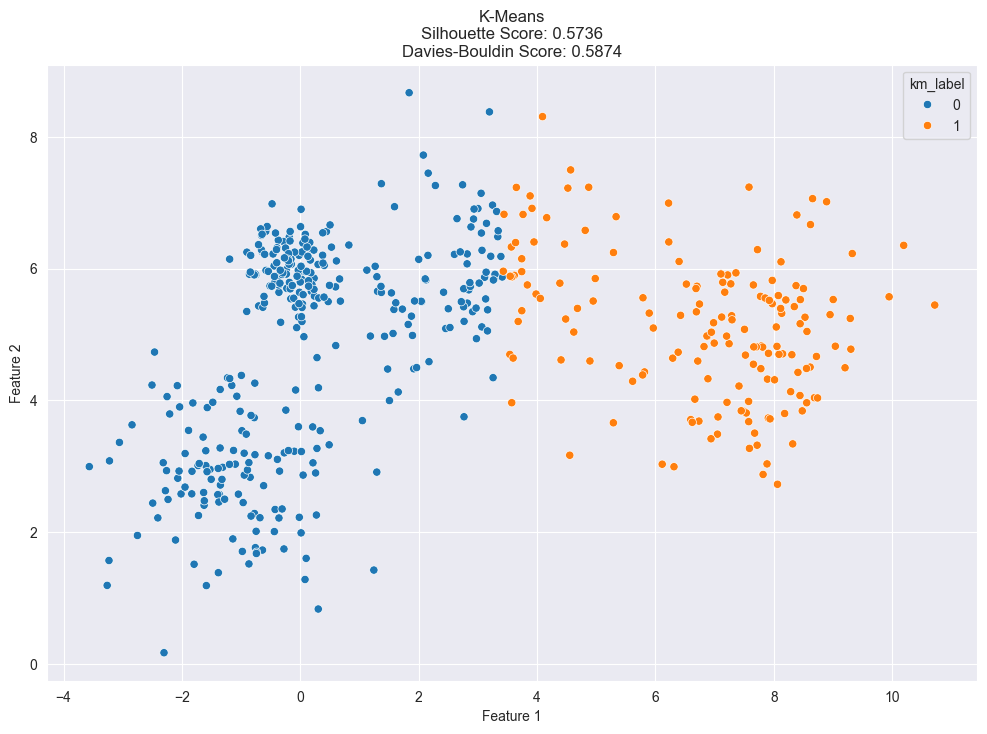

In [27]:
plt.figure(figsize=(12, 8))
# Plot k-means results
sns.scatterplot(data=df, x='feature_1', y='feature_2', hue='km_label', legend='full', palette='tab10')
plt.title(f'K-Means\nSilhouette Score: {np.round(silhouette_score(X=df[["feature_1", "feature_2"]], labels=df.km_label), 4)}\nDavies-Bouldin Score: {np.round(davies_bouldin_score(X=df[["feature_1", "feature_2"]], labels=df.km_label), 4)}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

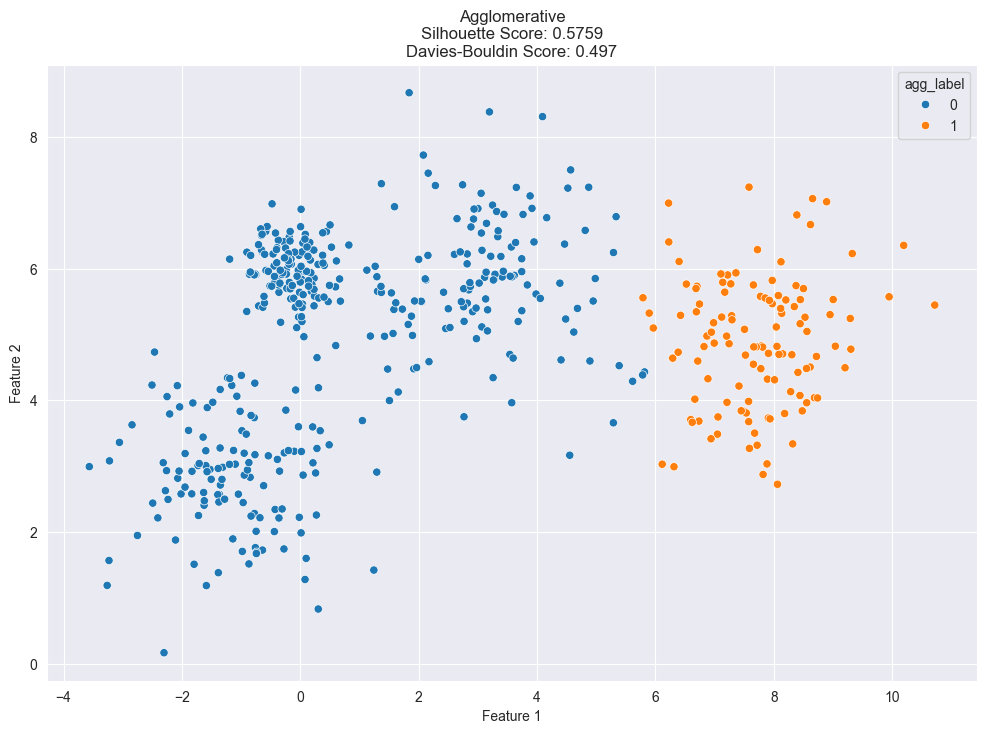

In [28]:
plt.figure(figsize=(12, 8))
# Plot agglomerative results
sns.scatterplot(data=df, x='feature_1', y='feature_2', hue='agg_label', legend='full', palette='tab10')
plt.title(f'Agglomerative\nSilhouette Score: {np.round(silhouette_score(X=df[["feature_1", "feature_2"]], labels=df.agg_label), 4)}\nDavies-Bouldin Score: {np.round(davies_bouldin_score(X=df[["feature_1", "feature_2"]], labels=df.agg_label), 4)}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

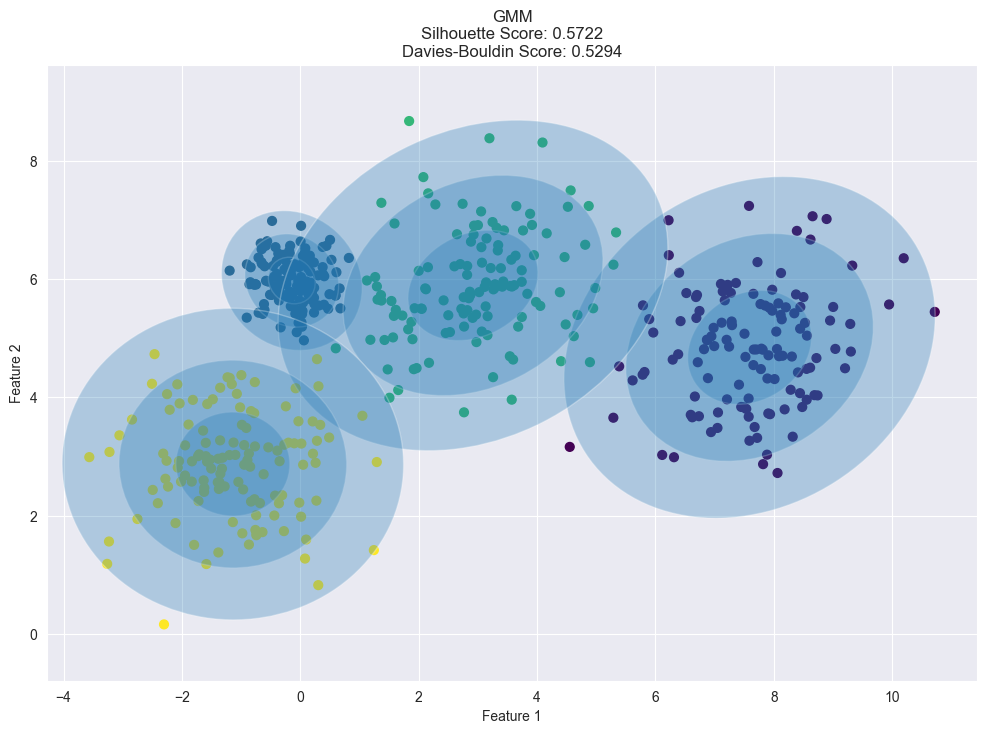

In [29]:
plt.figure(figsize=(12, 8))
# Plot mixture model results
plot_gmm(gmm=gmm, X=df[["feature_1", "feature_2"]].values)
plt.title(f'GMM\nSilhouette Score: {np.round(silhouette_score(X=df[["feature_1", "feature_2"]], labels=df.gm_label), 4)}\nDavies-Bouldin Score: {np.round(davies_bouldin_score(X=df[["feature_1", "feature_2"]], labels=df.gm_label), 4)}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

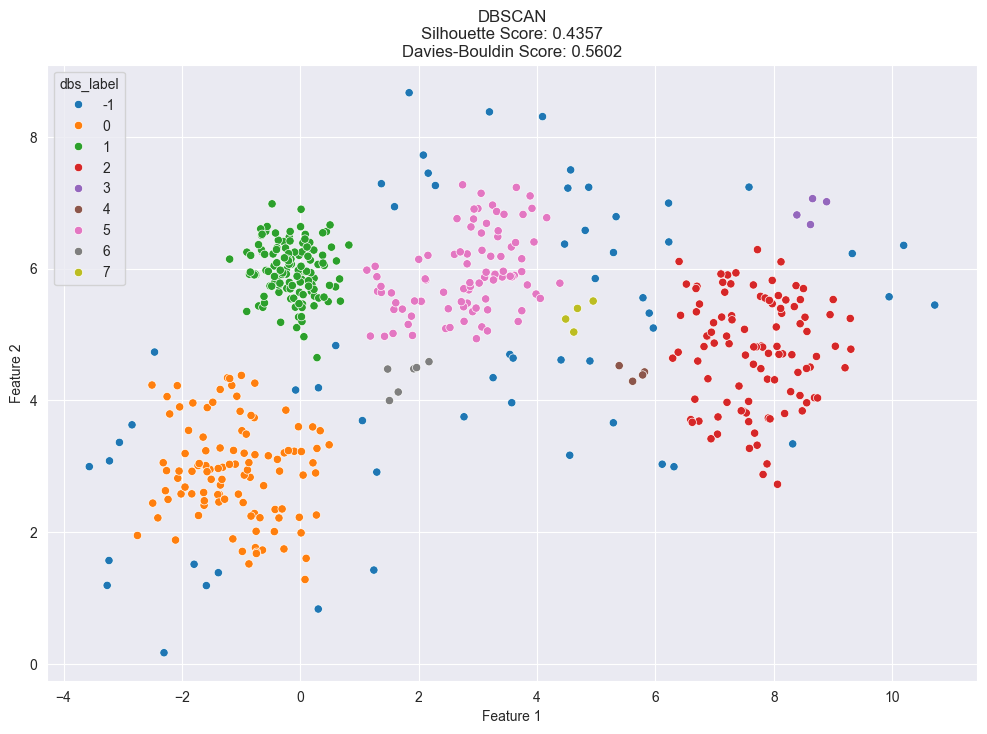

In [30]:
plt.figure(figsize=(12, 8))
# Plot DBSCAN results
sns.scatterplot(x='feature_1', y='feature_2', data=df, hue='dbs_label', legend='full', palette='tab10')
plt.title(f'DBSCAN\nSilhouette Score: {np.round(silhouette_score(X=df[["feature_1", "feature_2"]][df.dbs_label != -1], labels=df.dbs_label[df.dbs_label != -1]), 4)}\nDavies-Bouldin Score: {np.round(davies_bouldin_score(X=df[["feature_1", "feature_2"]][df.dbs_label != -1], labels=df.dbs_label[df.dbs_label != -1]), 4)}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Conclusion:**
- While the agglomerative model performed the best in terms of silhouette and Davies-Bouldin scores, visually, the Gaussian Mixture Model appeared to do the best job of modeling the varied densities of the dataset within its clusters.
- Because the Gaussian Mixture Model best reflects the structure and composition of the underlying data, it is the 'best' model in this context.